# 0. Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [6]:
files

{'PIPELINE_CONFIG': 'Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow\\scripts\\generate_tfrecord.py',
 'LABELMAP': 'Tensorflow\\workspace\\annotations\\label_map.pbtxt'}

# 1. Downloaded TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [7]:
# https://www.tensorflow.org/install/source_windows

In [8]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
No local packages or working download links found for tensorflow-text~=2.15.0
error: Could not find suitable distribution for Requirement.parse('tensorflow-text~=2.15.0')


Obtaining file:///C:/Users/umair/Tensorflow%20Gesture%20Rec/TFGR/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


In [23]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.10: C:\Users\umair\Tensorflow Gesture Rec\TFGR\tfgr\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2023-12-19 01:39:18.822264: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-19 01:39:19.389870: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2145 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
C:\Users\umair\Tensorflow Gesture Rec\TFGR\tfgr\lib\site-packages\object_detection-0.1-py3.9.egg\object_detection\builders\model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  loggi

In [20]:
!pip install pyyaml

   ---------------------------------------- 0.0/152.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/152.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/152.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/152.8 kB ? eta -:--:--
   ------- ------------------------------- 30.7/152.8 kB 435.7 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/152.8 kB 544.7 kB/s eta 0:00:01
   -------------------- ------------------ 81.9/152.8 kB 416.7 kB/s eta 0:00:01
   ---------------------------- --------- 112.6/152.8 kB 504.4 kB/s eta 0:00:01
   ----------------------------------- -- 143.4/152.8 kB 532.5 kB/s eta 0:00:01
   -------------------------------------- 152.8/152.8 kB 535.8 kB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.15.0 requires gin-config, which is not installed.
tf-models-official 2.15.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.15.0 requires immutabledict, which is not installed.
tf-models-official 2.15.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.15.0 requires oauth2client, which is not installed.
tf-models-official 2.15.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.15.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.15.0 requires sentencepiece, which is not installed.
tf-models-official 2.15.0 requires seqeval, which is not installed.
tf-models-official 2.15.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.15.0 requires tensorflow-hub>=0.6.0, 

In [18]:
!pip install importlib-resources

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.8.2 requires contourpy>=1.0.1, which is not installed.
matplotlib 3.8.2 requires fonttools>=4.22.0, which is not installed.


In [34]:
!pip install tensorflow --upgrade

  Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl.metadata (5.1 kB)
  Using cached protobuf-4.25.1-cp39-cp39-win_amd64.whl.metadata (541 bytes)
  Using cached tensorboard-2.15.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl.metadata (540 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl (300.8 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl (422 kB)
Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.15.0 requires gin-config, which is not installed.
tf-models-official 2.15.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.15.0 requires immutabledict, which is not installed.
tf-models-official 2.15.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.15.0 requires oauth2client, which is not installed.
tf-models-official 2.15.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.15.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.15.0 requires sentencepiece, which is not installed.
tf-models-official 2.15.0 requires seqeval, which is not installed.
tf-models-official 2.15.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.15.0 requires tensorflow-hub>=0.6.0, 

In [16]:
!pip install kiwisolver --force-reinstall --upgrade

   ---------------------------------------- 0.0/56.2 kB ? eta -:--:--
   ------- -------------------------------- 10.2/56.2 kB ? eta -:--:--
   --------------------- ------------------ 30.7/56.2 kB 435.7 kB/s eta 0:00:01
   ------------------------------------ --- 51.2/56.2 kB 327.7 kB/s eta 0:00:01
   ---------------------------------------- 56.2/56.2 kB 326.0 kB/s eta 0:00:00
  Attempting uninstall: kiwisolver
    Found existing installation: kiwisolver 1.4.5
    Uninstalling kiwisolver-1.4.5:
      Successfully uninstalled kiwisolver-1.4.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.8.2 requires contourpy>=1.0.1, which is not installed.
matplotlib 3.8.2 requires fonttools>=4.22.0, which is not installed.
matplotlib 3.8.2 requires importlib-resources>=3.2.0, which is not installed.


In [11]:
!pip install numpy --upgrade

In [39]:
pip install --upgrade "protobuf<=3.20.1"

  Using cached protobuf-3.20.1-cp39-cp39-win_amd64.whl (904 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.52.0 requires cloudpickle~=2.2.1, which is not installed.
apache-beam 2.52.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.52.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.52.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.52.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.52.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.52.0 requires httplib2<0.23.0,>=0.8, which is not installed.
apache-beam 2.52.0 requires js2py<1,>=0.74, which is not installed.
apache-beam 2.52.0 requires jsonschema<5.0.0,>=4.0.0, which is not installed.
apache-beam 2.52.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.52.0 requires orjson<4,>=3.9.7, which is not installed.
apache-beam 2.52.0 requir

In [19]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

  Using cached protobuf-4.25.1-cp39-cp39-win_amd64.whl.metadata (541 bytes)
  Using cached matplotlib-3.2.0.tar.gz (40.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/413.4 kB 1.4 MB/s eta 0:00:01
   -- ------------------------------------- 30.7/413.4 kB 1.4 MB/s eta 0:00:01
   -- ------------------------------------- 30.7/413.4 kB 1.4 MB/s eta 0:00:01
   ----- --------------------------------- 61.4/413.4 kB 297.7 kB/s eta 0:00:02
   ---------- --------------------------- 112.6/413.4 kB 504.4 kB/s eta 0:00:01
   ----------- -------------------------- 122.9/413.4 kB 425.1 kB/s eta 0:00:01
   ----------------- -------------------- 194.6/413.4 kB 562.0 kB/s eta 0:00:01
   ---------------------- --------------- 245.8/413.4 kB 684.7 kB/s eta 0:00:01
   ------------------------------ ------- 327.7/413.4 kB 752.2 kB

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [583 lines of output]
  
  Edit setup.cfg to change the build options; suppress output with --quiet.
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.2.0]
        python: yes [3.9.10 (tags/v3.9.10:f2f3f53, Jan 17 2022, 15:14:21) [MSC
                    v.1929 64 bit (AMD64)]]
      platform: yes [win32]
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  copying lib\pylab.py -> build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\afm.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\animation.py -> build\lib.win-amd64-3.9\matplotlib


In [9]:
import object_detection

In [10]:
!pip list

Package                      Version             Editable project location
---------------------------- ------------------- --------------------------------------------------------------------------
absl-py                      2.0.0
apache-beam                  2.52.0
asttokens                    2.4.1
astunparse                   1.6.3
avro-python3                 1.10.2
backcall                     0.2.0
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contextlib2                  21.6.0
cycler                       0.12.1
Cython                       3.0.5
debugpy                      1.8.0
decorator                    5.1.1
executing                    2.0.1
flatbuffers                  23.5.26
gast                         0.3.3
gin                          0.1.6
gin-config                   0.5.0
google-auth                  2.23.4
google-auth-oauthli

In [14]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [7]:
labels = [{'name':'Hello', 'id':1}, {'name':'Yes', 'id':2}, {'name':'No', 'id':3}, {'name':'Thanks', 'id':4}, {'name':'I Love You', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Creating TF records

In [8]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [18]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [23]:
!pip install pytz

   ---------------------------------------- 0.0/502.5 kB ? eta -:--:--
   -- ------------------------------------- 30.7/502.5 kB 1.4 MB/s eta 0:00:01
   -- ------------------------------------- 30.7/502.5 kB 1.4 MB/s eta 0:00:01
   ---- ---------------------------------- 61.4/502.5 kB 409.6 kB/s eta 0:00:02
   --------- ---------------------------- 122.9/502.5 kB 654.9 kB/s eta 0:00:01
   ---------- --------------------------- 143.4/502.5 kB 711.9 kB/s eta 0:00:01
   ------------- ------------------------ 174.1/502.5 kB 618.3 kB/s eta 0:00:01
   -------------------- ----------------- 266.2/502.5 kB 820.5 kB/s eta 0:00:01
   -------------------- ----------------- 266.2/502.5 kB 820.5 kB/s eta 0:00:01
   ------------------------- ------------ 337.9/502.5 kB 807.1 kB/s eta 0:00:01
   ---------------------------------------  501.8/502.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 502.5/502.5 kB 1.1 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas 2.1.3 requires tzdata>=2022.1, which is not installed.
apache-beam 2.52.0 requires cloudpickle~=2.2.1, which is not installed.
apache-beam 2.52.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.52.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.52.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.52.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.52.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.52.0 requires httplib2<0.23.0,>=0.8, which is not installed.
apache-beam 2.52.0 requires js2py<1,>=0.74, which is not installed.
apache-beam 2.52.0 requires jsonschema<5.0.0,>=4.0.0, which is not installed.
apache-beam 2.52.0 requires objsize<0.7.0,>=0.6.1, which is not installed.
apache-beam 2.52.0 requires orjso

In [20]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copying Model Config to Training Folder

In [21]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Updating Config For Transfer Learning

In [13]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [29]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [30]:
config

{'model': ssd {
   num_classes: 5
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [31]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [32]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size =5
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [33]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Training the model

In [36]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [37]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [38]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=3000


In [27]:
!{command}

^C


# 7. Evaluating the Model

In [39]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [40]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Loading Train Model From Checkpoint

In [7]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [8]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Sign Image Detection

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [11]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'hello.fcd43c86-682a-11ee-ba89-ceacdf806867.jpg')

In [12]:
IMAGE_PATH

'Tensorflow\\workspace\\images\\test\\hello.fcd43c86-682a-11ee-ba89-ceacdf806867.jpg'

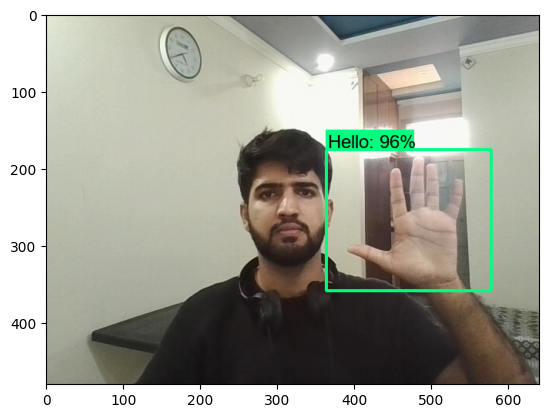

In [13]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections Camera

In [14]:
!pip uninstall opencv-python-headless -y

In [15]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [87]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [88]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [89]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [90]:
!{command}

2023-11-23 04:25:04.227992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 04:25:04.891943: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2145 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1123 04:25:07.257041 12816 deprecation.py:623] From C:\Users\umair\Tensorflow Gesture Rec\TFGR\tfgr\lib\site-packages\tensorflow\python\autograph\impl\api.py:4

# 11. Conversion to TFJS

In [19]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [91]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [92]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [93]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [94]:
!{command}

2023-11-23 04:28:14.607279: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 04:28:15.520962: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2145 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
I1123 04:28:17.693912 13144 api.py:459] feature_map_spatial_dims: [(40, 40), (20, 20), (10, 10), (5, 5), (3, 3)]
2023-11-23 04:28:19.862879: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2145 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
2023-11-23 04:28:19.8

In [95]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [96]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [97]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [98]:
!{command}

Estimated count of arithmetic ops: 1.714 G  ops, equivalently 0.857 G  MACs


2023-11-23 04:28:58.386650: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 04:28:58.956287: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2145 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
2023-11-23 04:29:04.801668: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-11-23 04:29:04.801689: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-11-23 04:29:04.802230: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: Tensorflow\workspace\models\my_ssd_mobnet\t

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')